In [1]:
#Importar todas as bibliotecas que podem ser usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date, datetime

In [4]:
# Importar os dados e Mostrar as informações gerais do arquivo
df = pd.read_csv('/content/sample_data/Walmart.csv', sep = ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Checar os dados
df.shape
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [6]:
# Renomear as colunas
df.rename(columns = {
    'Store':'Loja',
    'Date':'Data',	
    'Weekly_Sales':'Vendas_na_Semana',	
    'Holiday_Flag':'Semana_com_Feriado',	
    'Temperature':'Temperatura',
    'Fuel_Price':'Preco_Combustivel',
    'Unemployment':'Desemprego'
    }, inplace = True)
df

Loja        Data  Vendas_na_Semana  Semana_com_Feriado  Temperatura  \
0        1  05-02-2010        1643690.90                   0        42.31   
1        1  12-02-2010        1641957.44                   1        38.51   
2        1  19-02-2010        1611968.17                   0        39.93   
3        1  26-02-2010        1409727.59                   0        46.63   
4        1  05-03-2010        1554806.68                   0        46.50   
...    ...         ...               ...                 ...          ...   
6430    45  28-09-2012         713173.95                   0        64.88   
6431    45  05-10-2012         733455.07                   0        64.89   
6432    45  12-10-2012         734464.36                   0        54.47   
6433    45  19-10-2012         718125.53                   0        56.47   
6434    45  26-10-2012         760281.43                   0        58.85   

      Preco_Combustivel         CPI  Desemprego  
0                 2.572  211.096358       8.106  
1                 2.548  211.242170       8.106  
2                 2.514  211.289143       8.106  
3                 2.561  211.319643       8.106  
4                 2.625  211.350143       8.106  
...                 ...         ...         ...  
6430              3.997  192.013558       8.684  
6431              3.985  192.170412       8.667  
6432              4.000  192.327265       8.667  
6433              3.969  192.330854       8.667  
6434              3.882  192.308899       8.667  

[6435 rows x 8 columns]

In [8]:
df['Data'] = pd.to_datetime(df['Data'], format = '%d-%m-%Y')
df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month
df['Semana'] = df['Data'].dt.isocalendar().week
df.head()

Loja       Data  Vendas_na_Semana  Semana_com_Feriado  Temperatura  \
0     1 2010-02-05        1643690.90                   0        42.31   
1     1 2010-02-12        1641957.44                   1        38.51   
2     1 2010-02-19        1611968.17                   0        39.93   
3     1 2010-02-26        1409727.59                   0        46.63   
4     1 2010-03-05        1554806.68                   0        46.50   

   Preco_Combustivel         CPI  Desemprego   Ano  Mês  Semana  
0              2.572  211.096358       8.106  2010    2       5  
1              2.548  211.242170       8.106  2010    2       6  
2              2.514  211.289143       8.106  2010    2       7  
3              2.561  211.319643       8.106  2010    2       8  
4              2.625  211.350143       8.106  2010    3       9

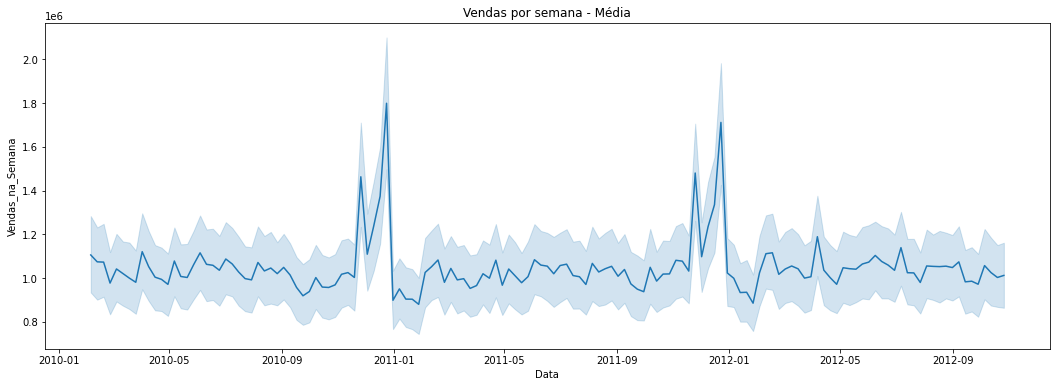

In [33]:
# Relação entre vendas e períodos semanais

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x='Data', y='Vendas_na_Semana')
plt.title('Vendas por semana - Média')
plt.show()

In [12]:
df.describe(percentiles = [0.8, 0.9, 0.95, 0.99])

Loja  Vendas_na_Semana  Semana_com_Feriado  Temperatura  \
count  6435.000000      6.435000e+03         6435.000000  6435.000000   
mean     23.000000      1.046965e+06            0.069930    60.663782   
std      12.988182      5.643666e+05            0.255049    18.444933   
min       1.000000      2.099862e+05            0.000000    -2.060000   
50%      23.000000      9.607460e+05            0.000000    62.670000   
80%      36.200000      1.539977e+06            0.000000    77.782000   
90%      41.000000      1.887626e+06            0.000000    83.992000   
95%      43.000000      2.049179e+06            1.000000    87.663000   
99%      45.000000      2.404035e+06            1.000000    93.190000   
max      45.000000      3.818686e+06            1.000000   100.140000   

       Preco_Combustivel          CPI   Desemprego          Ano          Mês  \
count        6435.000000  6435.000000  6435.000000  6435.000000  6435.000000   
mean            3.358607   171.578394     7.999151  2010.965035     6.447552   
std             0.459020    39.356712     1.875885     0.797019     3.238308   
min             2.472000   126.064000     3.879000  2010.000000     1.000000   
50%             3.445000   182.616521     7.874000  2011.000000     6.000000   
80%             3.795000   214.694328     8.876000  2012.000000    10.000000   
90%             3.916000   219.534098     9.863000  2012.000000    11.000000   
95%             4.029000   221.926729    12.187000  2012.000000    12.000000   
99%             4.203000   225.470151    14.180000  2012.000000    12.000000   
max             4.468000   227.232807    14.313000  2012.000000    12.000000   

            Semana  
count  6435.000000  
mean     25.818182  
std      14.129201  
min       1.000000  
50%      26.000000  
80%      40.000000  
90%      45.000000  
95%      49.000000  
99%      52.000000  
max      52.000000

In [14]:
df.groupby(by='Loja').mean().sort_values(by='Vendas_na_Semana', ascending = False).head()

Vendas_na_Semana  Semana_com_Feriado  Temperatura  Preco_Combustivel  \
Loja                                                                         
20        2.107677e+06             0.06993    55.451399           3.417608   
4         2.094713e+06             0.06993    62.253357           3.216972   
14        2.020978e+06             0.06993    57.790979           3.417608   
13        2.003620e+06             0.06993    53.697133           3.286147   
2         1.925751e+06             0.06993    68.216364           3.219699   

             CPI  Desemprego          Ano       Mês     Semana  
Loja                                                            
20    209.038131    7.371413  2010.965035  6.447552  25.818182  
4     128.679669    5.964692  2010.965035  6.447552  25.818182  
14    186.285678    8.648748  2010.965035  6.447552  25.818182  
13    128.679669    7.001825  2010.965035  6.447552  25.818182  
2     215.646311    7.623846  2010.965035  6.447552  25.818182

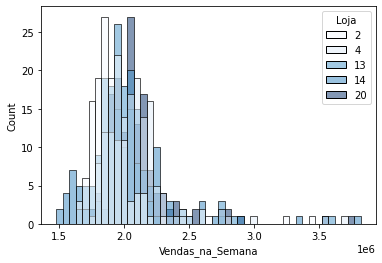

In [16]:
sns.histplot(data=df[df.Loja.isin([20,4,14,13,2])], x='Vendas_na_Semana', hue='Loja', palette='Blues')

In [20]:
#Preço médio de venda semanal por loja

# copy df
df_group = df.copy()
    
# groupby
df_group = df.groupby(by='Loja').mean()

# sortvalues
df_group = df_group.sort_values(by = 'Vendas_na_Semana', ascending = False)

df_group

Vendas_na_Semana  Semana_com_Feriado  Temperatura  Preco_Combustivel  \
Loja                                                                         
20        2.107677e+06             0.06993    55.451399           3.417608   
4         2.094713e+06             0.06993    62.253357           3.216972   
14        2.020978e+06             0.06993    57.790979           3.417608   
13        2.003620e+06             0.06993    53.697133           3.286147   
2         1.925751e+06             0.06993    68.216364           3.219699   
10        1.899425e+06             0.06993    72.241189           3.575923   
27        1.775216e+06             0.06993    57.311119           3.578294   
6         1.564728e+06             0.06993    69.700000           3.219699   
1         1.555264e+06             0.06993    68.306783           3.219699   
39        1.450668e+06             0.06993    70.597343           3.219699   
19        1.444999e+06             0.06993    52.295035           3.578294   
31        1.395901e+06             0.06993    68.847622           3.219699   
23        1.389864e+06             0.06993    48.805105           3.441741   
24        1.356755e+06             0.06993    54.030000           3.578294   
11        1.356383e+06             0.06993    72.480769           3.219699   
28        1.323522e+06             0.06993    70.262797           3.606420   
41        1.268125e+06             0.06993    48.410350           3.241559   
32        1.166568e+06             0.06993    52.747552           3.241559   
18        1.084718e+06             0.06993    53.371259           3.441741   
22        1.028501e+06             0.06993    54.897133           3.441741   
12        1.009002e+06             0.06993    70.262797           3.606420   
26        1.002912e+06             0.06993    43.658252           3.441741   
34        9.667816e+05             0.06993    58.495874           3.216972   
40        9.641280e+05             0.06993    47.674545           3.441741   
35        9.197250e+05             0.06993    57.311119           3.417608   
8         9.087495e+05             0.06993    62.513986           3.219699   
17        8.935814e+05             0.06993    46.387203           3.286147   
45        7.859814e+05             0.06993    57.790979           3.417608   
21        7.560691e+05             0.06993    68.847622           3.219699   
25        7.067215e+05             0.06993    52.138392           3.417608   
43        6.333247e+05             0.06993    68.877692           3.219699   
15        6.233125e+05             0.06993    51.833846           3.578294   
7         5.706173e+05             0.06993    39.720280           3.241559   
42        5.564039e+05             0.06993    72.241189           3.575923   
9         5.439806e+05             0.06993    67.775175           3.219699   
29        5.394514e+05             0.06993    54.897133           3.441741   
16        5.192477e+05             0.06993    45.030070           3.241559   
37        5.189003e+05             0.06993    71.160350           3.219699   
30        4.385796e+05             0.06993    68.847622           3.219699   
3         4.027044e+05             0.06993    71.434196           3.219699   
38        3.857317e+05             0.06993    70.262797           3.606420   
36        3.735120e+05             0.06993    71.160350           3.204203   
5         3.180118e+05             0.06993    69.410140           3.219699   
44        3.027489e+05             0.06993    53.697133           3.286147   
33        2.598617e+05             0.06993    76.728182           3.575923   

             CPI  Desemprego          Ano       Mês     Semana  
Loja                                                            
20    209.038131    7.371413  2010.965035  6.447552  25.818182  
4     128.679669    5.964692  2010.965035  6.447552  25.818182  
14    186.285678    8.648748  2010.965035  6.447552  25.818182  
13    128.6796

In [21]:
# Selecionando as 5 melhores Lojas, considerando os parâmetros selecionados até aqui
top_5 = df_group.index.to_list()[:5]
top_5

[20, 4, 14, 13, 2]

In [22]:
# Qual atributo tem maior correlação (positiva ou negativa) com o número de vendas?
df.corr()

Loja  Vendas_na_Semana  Semana_com_Feriado  \
Loja                1.000000e+00         -0.335332       -4.386841e-16   
Vendas_na_Semana   -3.353320e-01          1.000000        3.689097e-02   
Semana_com_Feriado -4.386841e-16          0.036891        1.000000e+00   
Temperatura        -2.265908e-02         -0.063810       -1.550913e-01   
Preco_Combustivel   6.002295e-02          0.009464       -7.834652e-02   
CPI                -2.094919e-01         -0.072634       -2.162091e-03   
Desemprego          2.235313e-01         -0.106176        1.096028e-02   
Ano                 3.474318e-12         -0.018378       -5.678257e-02   
Mês                 2.910676e-15          0.076143        1.229958e-01   
Semana              3.106283e-15          0.074211        1.277427e-01   

                    Temperatura  Preco_Combustivel       CPI  Desemprego  \
Loja                  -0.022659           0.060023 -0.209492    0.223531   
Vendas_na_Semana      -0.063810           0.009464 -0.072634   -0.106176   
Semana_com_Feriado    -0.155091          -0.078347 -0.002162    0.010960   
Temperatura            1.000000           0.144982  0.176888    0.101158   
Preco_Combustivel      0.144982           1.000000 -0.170642   -0.034684   
CPI                    0.176888          -0.170642  1.000000   -0.302020   
Desemprego             0.101158          -0.034684 -0.302020    1.000000   
Ano                    0.064269           0.779470  0.074796   -0.241813   
Mês                    0.235862          -0.042156  0.004980   -0.012746   
Semana                 0.236183          -0.032403  0.006042   -0.015892   

                             Ano           Mês        Semana  
Loja                3.474318e-12  2.910676e-15  3.106283e-15  
Vendas_na_Semana   -1.837754e-02  7.614332e-02  7.421127e-02  
Semana_com_Feriado -5.678257e-02  1.229958e-01  1.277427e-01  
Temperatura         6.426923e-02  2.358618e-01  2.361833e-01  
Preco_Combustivel   7.794703e-01 -4.215590e-02 -3.240300e-02  
CPI                 7.479573e-02  4.979672e-03  6.041530e-03  
Desemprego         -2.418135e-01 -1.274559e-02 -1.589158e-02  
Ano                 1.000000e+00 -1.944645e-01 -1.819189e-01  
Mês                -1.944645e-01  1.000000e+00  9.959843e-01  
Semana             -1.819189e-01  9.959843e-01  1.000000e+00

In [23]:
sns.heatmap(df.corr(), cmap='Blues')

In [25]:
#Conclusão: O desemprego com correlação de -0,106. E "Loja" não é parâmetro porque é o ID, então, tudo indica que isso não interfere nas vendas.
print(df.corr()['Vendas_na_Semana'].sort_values())

Loja                 -0.335332
Desemprego           -0.106176
CPI                  -0.072634
Temperatura          -0.063810
Ano                  -0.018378
Preco_Combustivel     0.009464
Semana_com_Feriado    0.036891
Semana                0.074211
Mês                   0.076143
Vendas_na_Semana      1.000000
Name: Vendas_na_Semana, dtype: float64


In [28]:
# Lojas com maiores vendas e as semanas do ano que superou a média do período
df_maiores_vendas = df.copy()

df_20 = df_maiores_vendas[df_maiores_vendas.Loja == 20]

mean_20 = df_maiores_vendas[df_maiores_vendas.Loja == 20]['Vendas_na_Semana'].mean()

mean_20

2107676.8703496507

In [29]:
# Semanas que vendeu
df_20.shape[0]

143

In [31]:
# Semanas que vendeu acima da média
df_20[df_20.Vendas_na_Semana >= mean_20].shape[0]

52

In [32]:
df_20[df_20.Vendas_na_Semana >= mean_20].shape[0]/ df_20.shape[0] * 100

36.36363636363637

In [34]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df[df.Loja ==20], x='Data', y='Vendas_na_Semana')
sns.lineplot(data=df[df.Loja ==20], x='Data', y=df[df.Loja == 20]['Vendas_na_Semana'].mean(), c = 'Red', label = 'Média Hist. 20')
plt.title('Vendas por Semana - Média')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


In [36]:
#Gráfico com as vendas máximas, as vendas mínimas e a média de todas as lojas ao longo do tempo. Destaque para os 4 feriados principais.
holiday_dict = {
  'Super Bowl' : ['12/02/10', '11/02/11', '10/02/12', '8/02/13'],
  'Labour Day' : ['10/09/10', '9/09/11', '7/09/12', '6/09/13'],
  'Thanksgiving' : ['26/11/10', '25/11/11', '23/11/12', '29/11/13'],
  'Christmas' :['31/12/10', '30/12/11', '28/12/12', '27/12/13']
}

In [37]:
for i in holiday_dict.keys():
  print(i)
  for j in holiday_dict[i]:
    print(j)

Super Bowl
12/02/10
11/02/11
10/02/12
8/02/13
Labour Day
10/09/10
9/09/11
7/09/12
6/09/13
Thanksgiving
26/11/10
25/11/11
23/11/12
29/11/13
Christmas
31/12/10
30/12/11
28/12/12
27/12/13


In [40]:
#Recebendo o nome do feriado
for i in holiday_dict.keys():
  for j in holiday_dict[i]:
    print(f'{i} - {j[-2:]}')

Super Bowl - 10
Super Bowl - 11
Super Bowl - 12
Super Bowl - 13
Labour Day - 10
Labour Day - 11
Labour Day - 12
Labour Day - 13
Thanksgiving - 10
Thanksgiving - 11
Thanksgiving - 12
Thanksgiving - 13
Christmas - 10
Christmas - 11
Christmas - 12
Christmas - 13


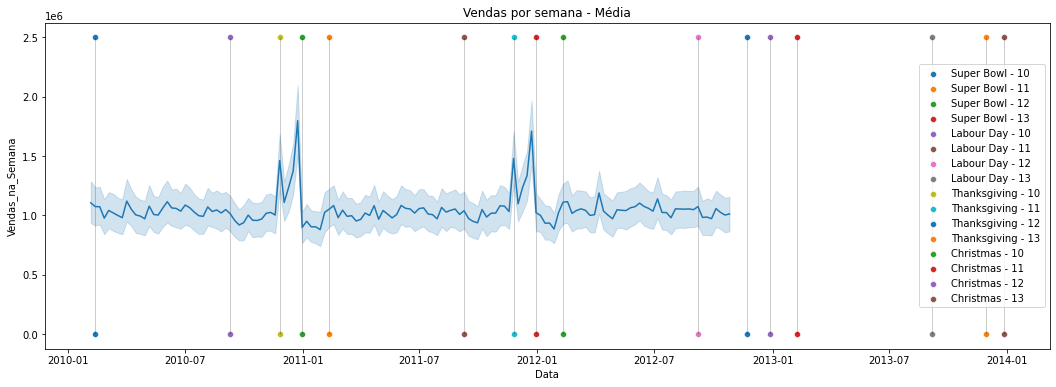

In [41]:
#Gráfico de análise

plt.figure(figsize = (18,6))
sns.lineplot(data=df, x = 'Data', y = 'Vendas_na_Semana')

for i in holiday_dict.keys():
  #print(i)
  for j in holiday_dict[i]:
    #print(j)

    date_target = datetime.strptime(j, '%d/%m/%y')
    
    sns.scatterplot(x=[date_target, date_target],
                    y = [0, 2.5*10**6], label = f'{i} - {j[-2:]}')
    sns.lineplot(x=[date_target, date_target],
                    y = [0, 2.5*10**6], linestyle = '--', color='black')


plt.title('Vendas por semana - Média')
plt.show()

In [43]:
#Escolha uma das lojas para expandir e justificar.
#Conclusão: A loja que tem mais vendas semanais acima da média é a que tem o maior faturamento histórico.
plt.figure(figsize=(18,6))
sns.lineplot(data=df, x='Data', y='Vendas_na_Semana', hue='Loja')
plt.title('Vendas por semana - Média')
plt.show()

In [44]:
# df copy
df_mean = df.copy()

# groupby
df_mean = df_mean.groupby('Loja', as_index = False).mean()

# seleção
df_mean = df_mean[['Loja', 'Vendas_na_Semana']]
df_mean

Loja  Vendas_na_Semana
0      1      1.555264e+06
1      2      1.925751e+06
2      3      4.027044e+05
3      4      2.094713e+06
4      5      3.180118e+05
5      6      1.564728e+06
6      7      5.706173e+05
7      8      9.087495e+05
8      9      5.439806e+05
9     10      1.899425e+06
10    11      1.356383e+06
11    12      1.009002e+06
12    13      2.003620e+06
13    14      2.020978e+06
14    15      6.233125e+05
15    16      5.192477e+05
16    17      8.935814e+05
17    18      1.084718e+06
18    19      1.444999e+06
19    20      2.107677e+06
20    21      7.560691e+05
21    22      1.028501e+06
22    23      1.389864e+06
23    24      1.356755e+06
24    25      7.067215e+05
25    26      1.002912e+06
26    27      1.775216e+06
27    28      1.323522e+06
28    29      5.394514e+05
29    30      4.385796e+05
30    31      1.395901e+06
31    32      1.166568e+06
32    33      2.598617e+05
33    34      9.667816e+05
34    35      9.197250e+05
35    36      3.735120e+05
36    37      5.189003e+05
37    38      3.857317e+05
38    39      1.450668e+06
39    40      9.641280e+05
40    41      1.268125e+06
41    42      5.564039e+05
42    43      6.333247e+05
43    44      3.027489e+05
44    45      7.859814e+05

In [46]:
aux_list =  []
aux_list_got = []

for i in df_mean.Loja:
  total = df[df.Loja == i].shape[0]
  aux_list.append(total)

  got = df[(df.Loja == i) & (df.Vendas_na_Semana >= df_mean.iloc[i-1,1])].shape[0]

  aux_list_got.append(got)

In [47]:
df_mean['Total'] = aux_list
df_mean['Got'] = aux_list_got
df_mean['Perc %'] = df_mean['Got']/df_mean['Total'] * 100

df_mean.sort_values(by = 'Perc %', ascending = False, inplace = True)

df_mean

Loja  Vendas_na_Semana  Total  Got     Perc %
42    43      6.333247e+05    143   73  51.048951
41    42      5.564039e+05    143   71  49.650350
35    36      3.735120e+05    143   71  49.650350
36    37      5.189003e+05    143   69  48.251748
37    38      3.857317e+05    143   68  47.552448
29    30      4.385796e+05    143   68  47.552448
32    33      2.598617e+05    143   67  46.853147
25    26      1.002912e+06    143   67  46.853147
13    14      2.020978e+06    143   66  46.153846
43    44      3.027489e+05    143   66  46.153846
39    40      9.641280e+05    143   65  45.454545
2      3      4.027044e+05    143   64  44.755245
15    16      5.192477e+05    143   64  44.755245
23    24      1.356755e+06    143   63  44.055944
40    41      1.268125e+06    143   62  43.356643
3      4      2.094713e+06    143   62  43.356643
38    39      1.450668e+06    143   61  42.657343
8      9      5.439806e+05    143   61  42.657343
6      7      5.706173e+05    143   61  42.657343
17    18      1.084718e+06    143   60  41.958042
26    27      1.775216e+06    143   59  41.258741
27    28      1.323522e+06    143   58  40.559441
16    17      8.935814e+05    143   57  39.860140
0      1      1.555264e+06    143   56  39.160839
22    23      1.389864e+06    143   56  39.160839
4      5      3.180118e+05    143   56  39.160839
5      6      1.564728e+06    143   56  39.160839
7      8      9.087495e+05    143   56  39.160839
31    32      1.166568e+06    143   55  38.461538
30    31      1.395901e+06    143   54  37.762238
18    19      1.444999e+06    143   53  37.062937
1      2      1.925751e+06    143   53  37.062937
11    12      1.009002e+06    143   53  37.062937
10    11      1.356383e+06    143   52  36.363636
12    13      2.003620e+06    143   52  36.363636
24    25      7.067215e+05    143   52  36.363636
19    20      2.107677e+06    143   52  36.363636
20    21      7.560691e+05    143   52  36.363636
14    15      6.233125e+05    143   51  35.664336
28    29      5.394514e+05    143   51  35.664336
44    45      7.859814e+05    143   49  34.265734
33    34      9.667816e+05    143   47  32.867133
9     10      1.899425e+06    143   47  32.867133
34    35      9.197250e+05    143   46  32.167832
21    22      1.028501e+06    143   45  31.468531